In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn 
import json

In [2]:
df = pd.read_json('../data/aggregated.json')

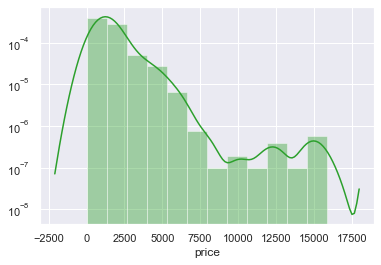

In [39]:
sns.set(style='darkgrid')
sns.distplot(df['price'], kde_kws={'bw':700}, bins=12, color='#2ca02c')
plt.yscale('log')

In [38]:
df['price'].describe()

count     7818.000000
mean      1583.984971
std       1095.510351
min          1.000000
25%        989.000000
50%       1299.000000
75%       1725.000000
max      15900.000000
Name: price, dtype: float64

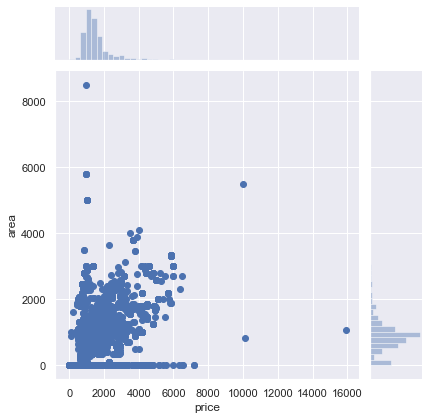

In [141]:
def clean_area(area):
    if isinstance(area, int):
        return area
    elif isinstance(area, float):
        return area
    elif re.search('(\d+)(?:\s*[\-\/+*]\s*)(\d+)', str(area)) != None and len(area) > 4:
        var = re.search('(\d+)(?:\s*[\-\/+*]\s*)(\d+)', str(area))
        return (int(var.group(1)) + int(var.group(2))) / 2
    elif re.search('(\d+)', area) != None:
        if re.search('(\d+)(?:x)(\d+)', area) != None:
            num = re.search('(\d+)(?:x)(\d+)', area)
            return int(num.group(1)) * int(num.group(2))
        area = area.replace(',', '').replace('~', '')
        return re.search('(\d+)', area).group(1)
    else:
        return None

area = df[df['area'].notnull()]['area'].apply(clean_area)
area = area[area.notnull()].astype(int)
df_plot = df.copy()
df_plot['area'] = area

sns.jointplot(x='price', y='area', data=df_plot)


In [ ]:
sns.set(style="white")
